<a href="https://colab.research.google.com/github/Haender-Michael/Haender_practice/blob/main/yes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SyriaTel Customer Churn Analysis and predictive Modeling



##Introduction
For this analysis, we will use the dataset: [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download) ,which contains comprehensive information about churn, customer service calls, account length (the number of days a client has had their account active), total calls per day, daily charge, etc.

The goal is to help the telecom business reduce the amount of money lost due to customer churn and build a model that will help predict the type of client that will likely do so.

## Methodology
#### **Exploratory Data Analysis (EDA)**
This step is essential to make sure things go smoothly and geting a good understanding of the dataset:
- dataset overview
- data cleaning
- data/ Business understanding
#### **Statistical modeling**
In this part we will use the insight that we get from the exploratory data analysis to make a predictive model of SyriaTel Customer churn.
#### **Major questions**
Questions that the management Team of SyriaTel might want to ask.These questions are based on our data and business understanding. They will be answered by our model.(recommendations will be provided along answering the major questions)
#### **Summary**
#### **Contact information**

## Exploratory Data Analysis (EDA)


#### **Dataset overview**



In [16]:
import pandas as pd
df = pd.read_csv("/content/bigml_59c28831336c6604c800002a.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

####**Data cleaning**

In [17]:
# Create a copy of the dataset
df1 = df.copy()
# remove duplicate
df1.drop_duplicates(inplace=True)
# Remove spaces from column names for easier access.
df1.columns = df1.columns.str.replace(' ', '_')
# Set 'phone_number' as the index
df1.set_index('phone_number', inplace=True)
# we wil drop area code, since there are about 51 states but just 3 area code.
df1.drop('area_code', axis=1, inplace=True)
# the dataset has no duplicates nor missing values
# the dataset was already pretty clean
# so  many other cleaning steps won't be necessary.
# each remaining column also has their data in a proper data type.

#### **Data/ Business understanding**
- check for class imbalance
- understanding

In [18]:
# let's check for class imbalance.
print('Raw counts: \n')
print(df1.churn.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
normalized_counts = df['churn'].value_counts(normalize=True)
print (normalized_counts)
print(f"{normalized_counts[False]*  100:.0f}% of the result is false")

Raw counts: 

churn
False    2850
True      483
Name: count, dtype: int64
-----------------------------------
Normalized counts: 

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64
86% of the result is false


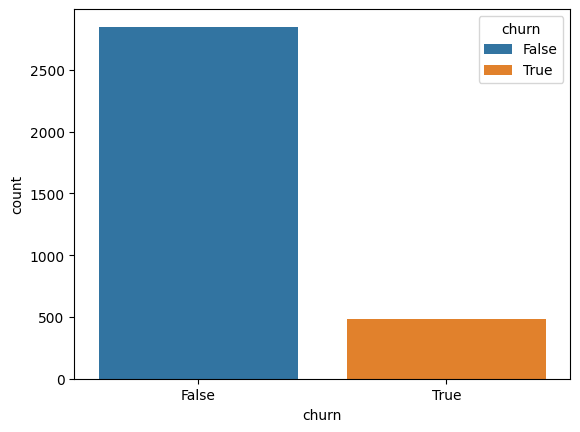

In [19]:
# There is indeed class imbalance let's graph it.
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='churn', data=df1, hue='churn')
# Save the plot to a file

plt.show()

# To save the plot as a JPEG file
# plt.savefig('churn_countplot.jpeg')

#### **Data Understanding**
The dataset tracks SyriaTel customers’ phone activity and contract details, including location, phone number, international and voicemail plans, and stored messages. It also records service usage—minutes, calls, and charges across day, evening, night, and international periods—plus customer service interactions. The target variable churn indicates whether a customer canceled their subscription. The goal is to identify patterns that predict churn.

####**Business Understanding**
Customer churn poses a financial risk for SyriaTel, making retention a priority. Understanding why customers leave—whether due to service quality, pricing, or support—is key. By analyzing usage and subscription data, the company can identify at-risk customers and build a predictive model to guide proactive retention strategies.




## Statistical modeling
- baseline model
- perfecting model
- final model

each model will be followed by an analysis of it's  performance.

In [20]:
# to start we will import the necessary library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

#### **Baseline model**
we will  use Logistic regression because it’s simple, interpretable, and well-suited for binary classification.


In [21]:
# let's build a baseline model.
y = df1['churn']
X = df1.drop(['churn'], axis=1)
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply one-hot encoding to categorical columns
X_categorical = pd.get_dummies(X[categorical_cols])

# Combine the numerical and encoded categorical columns
X = pd.concat([X[numerical_cols], X_categorical], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
# Suppress ConvergenceWarning from sklearn
warnings.filterwarnings("ignore", category=ConvergenceWarning, module='sklearn')

# Initialize the logistic regression Classifier with imbalanced class weight
logreg = LogisticRegression(fit_intercept=False, solver='lbfgs')

# Fit the model
model_log = logreg.fit(X_train, y_train)
print(model_log)

# Predict probabilities on the test set
y_score = logreg.decision_function(X_test)

# Calculate ROC curve and AUC (needed for AUC printout)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print(f'AUC for imBalanced Class Weight: {roc_auc}')
print('-------------------------------------------------------------------------------------')

# Make predictions for classification report and confusion matrix
y_pred = logreg.predict(X_test)

# Print Classification Report
print("\nClassification Report (imBalanced Class Weight):")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("\nConfusion Matrix (imBalanced Class Weight):")
print(confusion_matrix(y_test, y_pred))

LogisticRegression(fit_intercept=False)
AUC for imBalanced Class Weight: 0.7112656467315717
-------------------------------------------------------------------------------------

Classification Report (imBalanced Class Weight):
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       719
        True       0.33      0.09      0.14       115

    accuracy                           0.85       834
   macro avg       0.60      0.53      0.53       834
weighted avg       0.80      0.85      0.81       834


Confusion Matrix (imBalanced Class Weight):
[[699  20]
 [105  10]]


#### **Analysis**
the baseline model performs well enough to predict non churn but very poorly on churn (with low precision, accuracy and F-1 score) . and since we are mostly interested in churn we will keep tuning the model.

#### **perfecting model.**
we will have the baseline model tuned differently so that we can find the best model possible.
In the end all model will be represented on a ROC curve for a better comparaison.

#### **Model 2**

In [23]:
# Suppress ConvergenceWarning from sklearn
warnings.filterwarnings("ignore", category=ConvergenceWarning, module='sklearn')

# Initialize the logistic regression
logreg = LogisticRegression(fit_intercept=False, solver='lbfgs', class_weight='balanced')

# Fit the model
model_log = logreg.fit(X_train, y_train)
# Predict probabilities on the test set
y_score = logreg.decision_function(X_test)
y_predict = logreg.predict(X_test) # Predictions for Model 2

# Calculate ROC curve and AUC for Model 2
fpr_model2, tpr_model2, thresholds_model2 = roc_curve(y_test, y_score)
roc_auc_model2 = auc(fpr_model2, tpr_model2)

print(f'AUC for Model 2: {roc_auc_model2}')
print('-------------------------------------------------------------------------------------')

# Print Classification Report
print("\nClassification Report (Model 2):")
print(classification_report(y_test, y_predict))

# Print Confusion Matrix
print("\nConfusion Matrix (Model 2):")
print(confusion_matrix(y_test, y_predict))

AUC for Model 2: 0.7385862006409869
-------------------------------------------------------------------------------------

Classification Report (Model 2):
              precision    recall  f1-score   support

       False       0.92      0.70      0.80       719
        True       0.26      0.64      0.37       115

    accuracy                           0.69       834
   macro avg       0.59      0.67      0.58       834
weighted avg       0.83      0.69      0.74       834


Confusion Matrix (Model 2):
[[503 216]
 [ 41  74]]


####**Analysis**
This model showed improved performance in identifying churn, with recall for True rising from 0.09 in the baseline to 0.64 in the model.It also has a higher F1-score for the True class(the customer actually churn).

#### **Model 3**

In [24]:
# Suppress ConvergenceWarning from sklearn
warnings.filterwarnings("ignore", category=ConvergenceWarning, module='sklearn')

# Initialize the logistic regression
logreg = LogisticRegression(fit_intercept=False, solver='lbfgs', class_weight='balanced', penalty = "l2", max_iter = 5000)

# Fit the model
model_log = logreg.fit(X_train, y_train)
# Predict probabilities on the test set
y_score = logreg.decision_function(X_test)
y_pred = logreg.predict(X_test)

# Calculate ROC curve and AUC for Model 3
fpr_model3, tpr_model3, thresholds_model3 = roc_curve(y_test, y_score)
roc_auc_model3 = auc(fpr_model3, tpr_model3)

print(f'AUC for Model 3: {roc_auc_model3}')
print('-------------------------------------------------------------------------------------')
# Print Classification Report
print("\nClassification Report (Model 3):")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("\nConfusion Matrix (Model 3):")
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

AUC for Model 3: 0.8067243151720385
-------------------------------------------------------------------------------------

Classification Report (Model 3):
              precision    recall  f1-score   support

       False       0.95      0.74      0.83       719
        True       0.31      0.75      0.44       115

    accuracy                           0.74       834
   macro avg       0.63      0.74      0.64       834
weighted avg       0.86      0.74      0.78       834


Confusion Matrix (Model 3):
[[531 188]
 [ 29  86]]


#### **Analysis**
this model performs better in precision for both True and False and the f1-score has come from 0.37 to 0.44.
this model is better than the two former.

#### **Model 4**

In [25]:
# Import the XGBoost library for gradient boosting
import xgboost as xgb
# Initialize the XGBoost Classifier
# Use scale_pos_weight to handle class imbalance. This parameter is used to balance the classes
# in the training data by giving more weight to the minority class (churned customers).
churn_counts = df1['churn'].value_counts()
# Calculate the ratio of non-churned to churned customers
scale_pos_weight = churn_counts[False] / churn_counts[True]
xgb_model = xgb.XGBClassifier(objective='binary:logistic', # Set the objective function to binary logistic regression, suitable for binary classification
                              eval_metric='logloss', # Set the evaluation metric to logloss, which is commonly used for binary classification
                              use_label_encoder=False, # Suppress the warning about the deprecated use of label encoder
                              scale_pos_weight=scale_pos_weight, # Apply the calculated scale_pos_weight to handle class imbalance
                              random_state=0) # Set the random state for reproducibility

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict probabilities on the test set
# We are interested in the probability of the positive class (churn=True), which is the second column ([:, 1]).
y_score_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Print the AUC score
print(f'AUC for XGBoost Model: {roc_auc_xgb}')
print('-------------------------------------------------------------------------------------')

# Make predictions for classification report and confusion matrix
y_pred_xgb = xgb_model.predict(X_test)
# Print Classification Report
print("\nClassification Report (XGBoost Model):")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:12:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUC for XGBoost Model: 0.9315353449839754
-------------------------------------------------------------------------------------

Classification Report (XGBoost Model):
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       719
        True       0.81      0.83      0.82       115

    accuracy                           0.95       834
   macro avg       0.89      0.90      0.90       834
weighted avg       0.95      0.95      0.95       834



#### **Analysis**
this model perform great overall whether it's precision or recall. it is also likely to perfom well on unseen data. with an AUC of 0.93 it's the best of all  the models which is why we will keep it.

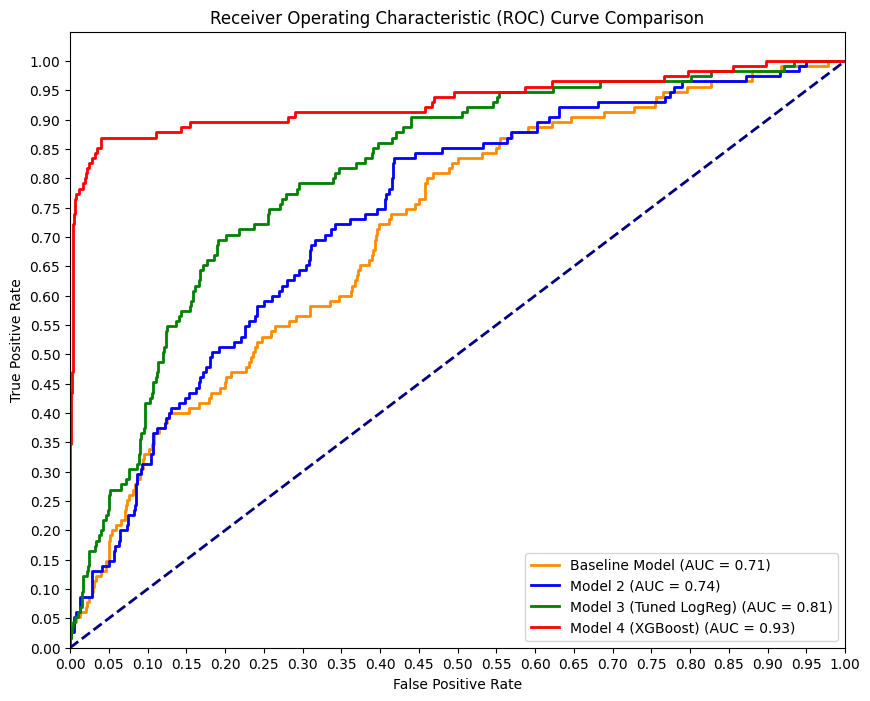

In [26]:
# Plot ROC curves for all models on the same graph
plt.figure(figsize=(10, 8))
lw = 2

# Plot ROC for Baseline Model (Model 1)
# fpr and tpr for the baseline model
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'Baseline Model (AUC = {roc_auc:.2f})')
# Model 2
plt.plot(fpr_model2, tpr_model2, color='blue', lw=lw, label=f'Model 2 (AUC = {roc_auc_model2:.2f})')


# Plot ROC for Model 3
plt.plot(fpr_model3, tpr_model3, color='green', lw=lw, label=f'Model 3 (Tuned LogReg) (AUC = {roc_auc_model3:.2f})')

# Plot ROC for Model 4 (XGBoost Model)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=lw, label=f'Model 4 (XGBoost) (AUC = {roc_auc_xgb:.2f})')


# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()

## Major questions

bellow are questions that the management Team of SyriaTel might want to ask.These questions are based on our data and business understanding .They will be answered by our model.
- What customers are most likely to churn ?
- Do customer service calls play a significant role in churn?
- Based on our analysis, what are actionable strategies to reduce churn?
- Which specific states have the highest churn rates?


#### **What customers are most likely to churn ?**

In [29]:
# Analyze feature importance from the XGBoost model
# The feature_importances_ attribute provides the importance score for each feature
feature_importances = xgb_model.feature_importances_

# Get the names of the features
features = X_train.columns

# Create a pandas Series for easier handling and sorting
feature_importance_series = pd.Series(feature_importances, index=features)

# Sort the features by importance in descending order
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print the top 10 most important features
print("Top 10 Most Important Features for Churn Prediction (XGBoost):")
print(sorted_feature_importance.head(10))

Top 10 Most Important Features for Churn Prediction (XGBoost):
international_plan_no     0.100623
customer_service_calls    0.071151
state_SD                  0.059375
state_MN                  0.051422
state_VA                  0.044444
state_FL                  0.040789
total_day_minutes         0.033859
state_ID                  0.033263
number_vmail_messages     0.031723
state_ME                  0.031024
dtype: float32


#### **Note**: the customers that make the most international  plan along with the most customer service calls are the most likely to churn.
#### **Recommendation**: the company may want to do additional data gathering on international calls, and try to see which of it's aspect botters client.

#### **Do customer service calls play a significant role in churn?**
Customers that has the most customer service call are the most likely to churn. This is a sign that the customer service might still has room for improvement.

**Recommentdation**: the company should put more effort on understanding clients problem,and fix them as effectively as possible.
the call from customers should be handle with tact, as customer satisfaction is likely to  reduce churn.

**Based on our analysis, what are actionable strategies to reduce churn?**

to reduce churn the company might want to give the clients a better experience on international calls. they might also want to handle customer call more efficiently. since clients with most international and customer service call churn.


**Which specific states have the highest churn rates?**
Mariland, Minesota and Virginia are the states that have the highest churn Rates.

**Recommendation**: further data should be gathered on this specific states.Poles might be a great way to proceed.

## Summary

> For this analysis, we used the [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download). We began with a dataset overview and performed necessary data cleaning. After cleaning, we gained a good understanding of the data and the business problem it addresses. We then developed different models to find the one that provides the best predictions on unseen data. Finally, we addressed major questions based on our analysis and provided recommendations.

##Contact Information

- First Name: Haender Michael

- Last Name: Jean Louis

- Email: michaelhaenderjeanlouis@gmail.com

- Phone Number: +509 41 75 0264

- LinkedIn: https://www.linkedin.com/in/michael-haender-jean-louis-4b7320316?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app

For further inquiries, feedback, or collaboration on this analysis, feel free to reach out. I welcome discussions and any contract to work with the head of the company's new movie team.